**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

This dataset is a collection of text messages, each with a label of either spam or ham. It’s not a clean CSV file, but it’s not terribly unstructured, either. Each row has a distinct text message and a distinct label as either spam or ham. So, in the context of text datasets, this is actually pretty well structured, so this shouldn’t be too difficult.

Reading the data and print it out:

In [ ]:
# Read in the raw text 
rawdata= open("SMSSpamCollection.tsv").read()
#Print the raw data
rawdata[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

You could see that it’s just basically a block of text, and you’ll see that you have these \t and these \n separators. The \t’s are between the labels and the text message bodies, and the \n’s are typically at the end of those lines.

The following code is going to replace \n with \t and then split this into a list:

In [ ]:
parsedData = rawdata.replace('\t','\n').split('\n')
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

Split the label and the text into lists:

In [ ]:
#Creating a new list with labels
label_list = parsedData[0::2]
#Creating a new list with texts
text_list=parsedData[1::2]
print(label_list[0:5])
print(text_list[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


While we try to combining both list to pandas dataframe we getting an "arrays must all be same length" error. So we will check the length of our lists.

In [ ]:
print(len(label_list))
print(len(text_list))

5571
5570


In [ ]:
#Checking the last 5 values of our label_list
label_list[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [ ]:
#Combining both lists to pandas dataframe
data = pd.DataFrame({
    'label': label_list[:-1],
    'body_text':text_list
})
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
#Shape of the data
print("Data has {} rows and {} columns.".format(len(data),len(data.columns)))

Data has 5570 rows and 2 columns.


In [ ]:
#How many spams and how many hams?
print("Out of {} rows, {} are spam, {} are ham.".format(len(data),len(data[data["label"]=="spam"]),len(data[data["label"]=="ham"])))

Out of 5570 rows, 746 are spam, 4824 are ham.


In [ ]:
#How much missing data?
print("Number of null in label: {}".format(data["label"].isnull().sum()))
print("Number of null in text: {}".format(data["body_text"].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


 **Removing Punctuation**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Fuction to remove the punctuation:

In [ ]:
import re
def remove_punct(text):
  text_nopunct= "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

In [ ]:
#Apply function to our text column and create a new column
data['body_text_clean']=data['body_text'].apply(lambda x:remove_punct(x))
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


**Tokenization**

Tokenizing is splitting some string or sentence into a list of words. The following code is going to tokenize text data:

In [ ]:
def tokenize(text):
  # The \W+ regex, indicates that it will split wherever it sees one or more non-word characters
  tokens=re.split("\W+",text)
  return tokens

In [ ]:
#Apply function to our text data
data['body_text_tokenized']=data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


**Removing Stop Words**

The last step in cleaning up this data is to remove stopwords. Stopwords are commonly-used words like the, but, if, that don’t contribute much to the meaning of a sentence. So we want to remove them, to limit the number of tokens Python actually has to look at when building our model. For instance, take the sentence, I am learning NLP. After tokenizing, it would have four tokens, I, am, learning, and NLP. Then after removing stopwords, instead of a list with four tokens, you’re now left with just learning and NLP. So it gets across the same message, and now, your machine learning model only has to look at half the number of tokens.

Get all stop words:

In [ ]:
nltk.download('stopwords')
stopword=nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Function to remove stopwords
def remove_stopwords(tokenized_list):
  text=[word for word in tokenized_list if word not in stopword]
  return text

In [ ]:
#Applying function to our text data
data['body_text_nostop']=data['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


**Stemming**

The formal definition of stemming is the process of reducing inflected or derived words to their word stem or root. More simply put, the process of stemming means often crudely chopping off the end of a word, to leave only the base. So this means taking words with various suffixes and condensing them under the same root word. Recall when we removed stop words, it was to reduce the number of words Python has to look at or consider. Stemming is shooting for the same goal by reducing variations of the same root word.

In [ ]:
ps = nltk.PorterStemmer()

In [ ]:
#Function for stemming
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [ ]:
#Applying function to our text data
data["body_text_stemmed"] = data["body_text_nostop"].apply(lambda x : stemming(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


Now it’s worth noting that the stemmer won’t do a great job with slang or abbreviations. So it’s probably not a great fit for a text message data set. To be noticed that entry is changed to entri with an i so it could also accommodate plural, entries. Same thing with wkli. Another one where, lives is reduced down to live. So, we know what stemming represents, and how to actually apply it. Stemming helps us reduce the corpus of words that the models are exposed to, and it explicitly correlates words with similar meaning.

**Lemmatizer**

Simply put, lemmatising is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word. So, type, typed, and typing would all be simplified down to type, because that’s the root of the word. Each variation carries the same meaning just with slightly different tense.

The difference with stemming is that stemming takes a more crude approach by just chopping off the ending of a word using heuristics, without any understanding of the context in which a word is used. Because of that, stemming may or may not return an actual word in the dictionary. And it’s usually less accurate, but the benefit is that it’s faster because the rules are quite simple. Lemmatizing leverages more informed analysis to create groups of words with similar meaning based on the context around the word, part of speech, and other factors. Lemmatizer will always return a dictionary word.

In [ ]:
wn=nltk.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Function for lemmatizer
def lemmatizer(tokenized_text):
  text=[wn.lemmatize(word) for word in tokenized_text]
  return text

In [ ]:
#Apply function
data["body_text_lemmatized"]=data['body_text_nostop'].apply(lambda x: lemmatizer(x))
data.head(10)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...","[winner, valued, network, customer, selected, ..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest...","[mobile, 11, month, u, r, entitled, update, la..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[im, gonna, be, home, soon, and, i, dont, want...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[six, chances, to, win, cash, from, 100, to, 2...","[six, chances, win, cash, 100, 20000, pounds, ...","[six, chanc, win, cash, 100, 20000, pound, txt...","[six, chance, win, cash, 100, 20000, pound, tx..."


There are a couple things that the lemmatizer was able to impact. It transitioned this lives down into life, and it also transitioned mobiles into mobile.

**Vectorizing**

The process that we use to convert text to a form that Python and a machine learning model can understand is called vectorizing. This is defined as the process of encoding text as integers to create feature vectors. A feature vector is an n-dimensional vector of numerical features that represent some object. So in our context, that means we’ll be taking an individual text message and converting it to a numeric vector that represents that text message.

What we’re doing when we vectorize text is we’re taking this dataset that has one line per document with the cell entry as the actual text message and then we’re converting it to a matrix that still has one line per document, but then you have every word used across all documents as the columns of your matrix. And then within each cell is counting how many times that certain word appeared in that document. And this is called your document term matrix. We’ll be referring to this term quite a bit. Then once we have this numeric representation of each text message, then we can carry on down the pipeline and fit and train a model.

To understand the motivation behind this process, as we mentioned previously that when looking at a word, Python only sees characters. So we need to convert this into a format that Python can understand in order for our machine learning models to start to learn what certain words indicate about the overall sentence or document or label that we’re trying to predict. So we vectorize this text to create a matrix that only has numeric entries. So in our case, counting how many times each word appears in each text message. The machine learning algorithm understands these counts. So if it sees a one or a two or a three in a cell, then that model can start to correlate that with whatever we’re trying to predict. In our case, that’s spam. To roughly understand then, what the words, sentences, and documents represent. So in our context, this means it can use how frequently these certain words appear to determine whether the individual text message is spam or not.

All three of vectorization methods will generate very similar document-term matrices where there’s one line per document, or text message in our case, and then the columns will represent each word or potentially a combination of words. The main difference between the three is what’s in the actual cells of the matrix. So we’ll start with count vectorization.

**1-Count Vectorization**

Count vectorization creates the document-term matrix and then simply counts the number of times each word appears in that given document, or text message in our case, and that’s what’s stored in the given cell.

Let's create a function to remove punctuation, tokenize, remove stopwords, and stem like we did before.But this time we’re not going to use a lambda function to apply it to our data, like we have in the past. The CountVectorizer actually allows you to pass in a function to clean and tokenize your data.

In [ ]:
# Read the file with the delimiter of tabs and set header to none
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)

# Setting the header manually
data.columns = ['label', 'body_text']

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect= CountVectorizer(analyzer=clean_text)
# If we only fit it, it won't actually do anything to our data.
# It'll just train the vectorizer object to learn what words are in the corpus.
# So if we want to actually fit it, and then transform our data, in other words,
# if we want to fit the vectorizer,
# and then actually vectorize our data and turn them into feature vectors,
# then we'll need to call fit_transform, and that'll actually do the fitting and transform our data.

X_counts= count_vect.fit_transform(data["body_text"])

print(X_counts.shape)
print(count_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


This tell us there are 5568 text messages, and across those 5570 text messages, there are 8107 unique words, which means, our document-term matrix has 5568 rows and 8107 columns, and then the get_feature_names, basically means, here are the names of the columns of our document-term matrix.

One thing to be noted is that the raw data output of the CountVectorizer, is what’s called a Sparse Matrix. So what is a Sparse Matrix? when you have a matrix in which a very high percent of the entries are zero, as we do in this case, instead of storing all these zeros in the full matrix, which would make it extremely inefficient, it’ll just be converted to only storing the locations and the values of the non-zero elements, which is much more efficient for storage.

In [ ]:
X_counts

<5568x8107 sparse matrix of type '<class 'numpy.int64'>'
	with 50137 stored elements in Compressed Sparse Row format>

In [ ]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


You’ll notice that the column names don’t contain the word they actually represent. They’re just numbered from zero to 8106. Now again, for Python, this doesn’t really matter because it doesn’t know the difference between a column name of 5, and a column name of text. So it’s just going to learn from the entries in that column, and its relationship with our label, to figure out how it can contribute to the model.

To be able to see what words those columns actually represent:

In [ ]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**2-N-gram Vectorizing**

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

The n-grams process creates a document-term matrix like we saw before. Now we still have one row per text message and we still have counts that occupy the individual cells but instead of the columns representing single terms like we saw in the previous method, now they represent all combinations of adjacent words of length and in your text. When you use n-grams there’s usually an optimal n value or range that will yield the best performance. Generally you’ll tune this value to see what generates the best model. The value here is that you get a little more context around your words. Rather than only seeing one word at a time, you’ll see two or three or four. 

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword])
    return text

data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to tha...,ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [ ]:
#Apply CountVectorizer with N-grams
#only search for bigram(2,2)
#if search both unigram and bigram do(1,2)

ngram_vect = CountVectorizer(ngram_range = (2, 2))
X_counts = ngram_vect.fit_transform(data["cleaned_text"])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5568, 31275)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


You can see that we still have the same 5568 rows but now there’s over 31,275 columns. That means 31,275 unique combinations of two words. In these feature names, you’ll see two-word combinations.

In [ ]:
data_sample = data[0:20]

# Only search for bigram (2, 2)
# if search both unigram and bigram, do (1, 2)
ngram_vect_sample = CountVectorizer(ngram_range = (2, 2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample["cleaned_text"])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names()
X_counts_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,4txtú120 poboxox36504w45wq,6day 16,81010 tc,87077 eg,87077 trywal,87121 receiv,87575 cost,900 prize,aft finish,aid patent,anymor tonight,appli 08452810075over18,appli repli,ard smth,around though,bless time,breather promis,brother like,call 09061701461,call mobil,caller press,callertun caller,camera free,cash 100,chanc win,claim 81010,claim call,claim code,click httpwap,click wap,...,text fa,thank breather,think goe,tkt 21st,tonight ive,treat like,tri month,trywal scotland,tsandc appli,txt csh11,txt messag,txt ratetc,txt ur,txt word,updat co,updat latest,ur lunch,ur nation,urgent week,use credit,usf live,valid 12,valu network,vettam set,want talk,wap link,way feel,way gota,week free,win cash,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


This is a brief introduction to how you implement n-grams. The value to n-grams over regular count vectorization is that it provides a little bit more context around words. There is certainly a trade-off when you’re choosing your n value for your n-grams. If you select only bigrams, then maybe that’s not enough to provide useful context. If you go all the way up to sevengrams, you’re going to have a ton of features and you’ll only see the same sevengram, in other words, the same sequence of seven words maybe in one text message. In other words what that means is every column of sevengrams would be non zero in only one row and you’d have a massive matrix. N-grams can be powerful but they require a little bit more care in implementing.

**Inverse Document Frequency Weighting (TF-IDF)**

TF-IDF creates a document term matrix, where there’s still one row per text message and the columns still represent single unique terms. But instead of the cells representing the count, the cells represent a weighting that’s meant to identify how important a word is to an individual text message.
$$
w_{i,j} = tf_{i,j} \times log\frac{N}{df_i}
$$
The above formula lays out how this weighting is determined.
You start with this TF term, which is just the number of times that term I occurs in text message J, divided by the number of terms in text message J. It’s just the percent of terms in this given text message that are this specific word.
For example (Descriptions below):
$$
tf_{NLP,j} = \frac{\text{\# of occurences of NLP}}{\text{number of words in text message}} = \frac{1}{3} = 0.\overline{33}
$$
$$
N = 20
$$
$$
df_{NLP} = 1
$$
$$
w_{i,j} = tf_{i,j} \times log{\frac{N}{df_i}}
$$
$$
w_{i,j} = 0.\overline{33} \times log{\frac{20}{1}}
$$
$$
w_{i,j} = 0.\overline{33} \times 1.301
$$
$$
w_{i,j} = 0.43
$$
In the above calculations, if we use “I like NLP,” and the word we’re focused on is NLP, then this term would be 1 divided by 3, or 0.33.  Then the second part of this equation measures how frequently this word occurs across all other text messages.  It calculates the number of text messages in the data set divided by the number of text messages that this word appears in.  That takes the log of all of that.  Let’s just say that we have 20 text messages, so that’s going to represent N in this case, and only one of those contains NLP.  That’s going to be df.  The second part of this equation would then be log of 20 divided by 1.  As this fraction inside the log gets larger, the log of that fraction also gets larger.  Now let’s say that you have 40 text messages instead of 20, but NLP still only occurs in one of them, so the denominator here will still only be 1.  Now this fraction is 40 over 1.  The term NLP is less frequent, and this term collectively is going to be larger.  Basically, all this says is that the rarer the word is, the higher that this value’s going to be.  If a word occurs very frequently within a particular text message, so that’s TF, but very infrequently elsewhere, that’s going to be the second term.  Then a very large number will be assigned, and it’ll be assumed to be very important to differentiating that text message from others.  In summary, this method helps you pull out important but seldom-used words.

In [ ]:
#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(data["body_text"])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 44)
[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'è', 'é', 'ì', 'ú', 'ü', '〨', '鈥']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,è,é,ì,ú,ü,〨,鈥
0,0.506544,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.187743,0.124958,0.048002,0.094423,0.328309,0.131770,0.103109,0.230078,0.235153,0.0,0.111229,0.168058,0.140173,0.162696,0.191419,0.159242,0.000000,0.367683,0.218196,0.268522,0.048575,0.069662,0.162684,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.462433,0.316910,0.314309,0.293566,0.0,0.064556,0.200330,0.0,0.144907,0.259220,0.0,0.140231,0.000000,0.119515,0.029387,0.227060,0.164039,0.000000,0.000000,0.195159,0.0,0.069234,0.078455,0.058167,0.126587,0.071488,0.132159,0.087066,0.152575,0.081489,0.310402,0.060470,0.086722,0.067508,0.113509,0.038667,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.494585,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.157123,0.000000,0.000000,0.197558,0.152647,0.137849,0.215733,0.385107,0.164001,0.0,0.116360,0.087906,0.000000,0.340404,0.320399,0.000000,0.000000,0.085477,0.091305,0.240780,0.304896,0.145752,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.432670,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.274907,0.114358,0.000000,0.086413,0.534150,0.000000,0.000000,0.084224,0.215205,0.0,0.305381,0.153802,0.000000,0.148895,0.070072,0.194311,0.000000,0.224329,0.079875,0.351062,0.000000,0.127506,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.200827,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.446602,0.000000,0.000000,0.561532,0.216939,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.241888,0.000000,0.000000,0.000000,0.000000,0.259521,0.228128,0.288875,0.000000,0.000000,0.000000,0.369435,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.470275,0.373171,0.222065,0.345683,0.0,0.000000,0.078631,0.0,0.341266,0.228929,0.0,0.165127,0.045794,0.140733,0.069207,0.106948,0.000000,0.000000,0.000000,0.201080,0.0,0.000000,0.123178,0.102739,0.208683,0.112240,0.155621,0.000000,0.119774,0.031985,0.196812,0.142412,0.000000,0.039746,0.000000,0.000000,0.088508,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5564,0.542272,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.241182,0.200658,0.000000,0.151625,0.234311,0.211596,0.165573,0.147784,0.000000,0.0,0.000000,0.134934,0.150060,0.130629,0.245904,0.170474,0.000000,0.131206,0.140152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50141,0.0,0.0
5565,0.347651,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.128852,0.000000,0.000000,0.162011,0.125180,0.000000,0.353830,0.000000,0.403475,0.0,0.000000,0.000000,0.160339,0.139577,0.394123,0.182151,0.000000,0.000000,0.449256,0.263273,0.166690,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5566,0.563448,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.096385,0.160380,0.123219,0.060595,0.515013,0.084561,0.132338,0.118119,0.201208,0.0,0.142759,0.107849,0.059969,0.104408,0.049136,0.000000,0.000000,0.104869,0.224038,0.295405,0.187034,0.089409,0.069600,0.117027,0.159462,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


You’ll notice this looks a lot different than our other matrices. Instead of regular integers in the cells, you have decimals. The 0.316934 in column ‘0’ and 1. text message is likely more important than the 0.222082 in column ‘1’ and 5565. text message.What that means is, either 0 occurs more frequently in the first text message than 1 does in the 5565. text message, or it means 0 occurs less frequently across all the other text messages than 1 does across all the other text messages.

So in summary, we created this false choice here, indicating that there are three different ways to vectorize. These are all very closely related, though, and some can actually be used together. TF-IDF is basically a count vectorizer that includes some consideration for the length of the document, and also how common the word is across other text messages. And then n-grams is just used within either of these two methods to look for groups of adjacent words instead of just looking for single terms. They’re all just slight modifications of each other, and typically you’ll test different vectorization methods depending on your problem, and then you let the results determine which one you use.

**Feature Engineering**

Feature engineering is the process of creating new features and/or transforming existing features to get the most out of your data. So up to this point, we’ve just been talking about what we’re given without really imagining what other features we might be able to extract from this data that would be helpful to predict spam or ham. The absence of this step could mean we’re potentially leaving some significant value on the table. So the model will now see the words in the text as represented by the vectorization, but nothing else.

What else could we extract from that text that would be helpful for the model to decipher spam from ham? For instance, maybe we could include the length of the text field. Maybe spam tends to be a little bit longer than real text messages. Or maybe we could include what percent of the characters in the text message are punctuation. Maybe real text messages underuse punctuation. Or maybe what percent of characters are capitalized are indicative of whether it’s spam or not. So that’s a couple ideas of some features that you could create that would help our model identify spam from nonspam.

So given these new features, or really any other already existing features, maybe you need to apply some sort of transformation to your data to make it more well-behaved. One broad popular type of transformations are called power transformations. So this would include squaring your data, taking the square root, et cetera. One example of why you might need to transform your data would be if you have a very skewed data set with a very long right tail where you have a lot of outliers. In that case, you might want to apply a log transformation which basically pulls that long tail and all those outliers back towards the bulk of the data. And what this does is it helps the model draw correlations and better understand the data without trying to overfit to that long tail and those outliers.

Feature engineering is the process of creating new features and/or transforming existing features to get the most out of your data. So up to this point, we’ve just been talking about what we’re given without really imagining what other features we might be able to extract from this data that would be helpful to predict spam or ham. The absence of this step could mean we’re potentially leaving some significant value on the table. So the model will now see the words in the text as represented by the vectorization, but nothing else.

What else could we extract from that text that would be helpful for the model to decipher spam from ham? For instance, maybe we could include the length of the text field. Maybe spam tends to be a little bit longer than real text messages. Or maybe we could include what percent of the characters in the text message are punctuation. Maybe real text messages underuse punctuation. Or maybe what percent of characters are capitalized are indicative of whether it’s spam or not. So that’s a couple ideas of some features that you could create that would help our model identify spam from nonspam.

So given these new features, or really any other already existing features, maybe you need to apply some sort of transformation to your data to make it more well-behaved. One broad popular type of transformations are called power transformations. So this would include squaring your data, taking the square root, et cetera. One example of why you might need to transform your data would be if you have a very skewed data set with a very long right tail where you have a lot of outliers. In that case, you might want to apply a log transformation which basically pulls that long tail and all those outliers back towards the bulk of the data. And what this does is it helps the model draw correlations and better understand the data without trying to overfit to that long tail and those outliers.

Another topic that falls under transformations is standardizing your data, or transforming it all to be on the same scale. Some models perform better when all features are on the same scale. It’s especially important as you get to this phase that you’re keeping the problem context in mind. When you do feature creation, you’re always trying to imagine what additional information might be helpful to the model within the context and understanding of what exactly it’s trying to predict. For instance, as an extreme example in our spam detection problem, the number of As that appear in a text message likely isn’t predictive of whether this is spam or ham. But maybe the amount of punctuation or the length of a text message is. So always keep your problem in mind. And this is the stage where you’re allowed to get a little bit creative to try to extract as much value out of your data as possible.

**Feature Creation**

In [ ]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [ ]:
#Create a feature for text message length
#We need to subtract white spaces
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [ ]:
#Create feature for % of text that is punctuation
def count_punct(text):
  count=sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")),3)*100

In [ ]:
data["punct%"]=data["body_text"].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


**Feature Evaluation**

The goal here is to generate new features that help a model distinguish spam from real text messages. So it’s always useful to find some way to see if your new features appear to be predictive, or correlated to the response in some way.

We’re going to build two histograms. The first is going to look at the distribution of our body length for spam, and then the second one is going to look at the distribution of body length for non-spam, and that’s how we’re going to use these histograms to see if this new created feature is helpful for distinguishing spam from non-spam.

The first parameter that we have to pass in is the thing that we actually want to plot, so that’s body_len.

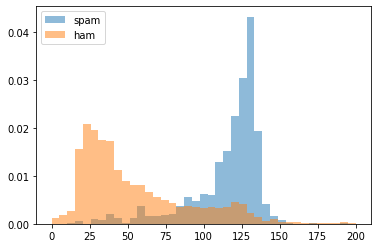

In [ ]:
# We're going to pass in the starting point, which is going to be zero,
# and then the maximum, and in our case for body length, we'll say it won't go any higher than 200.
# Then we tell it how many cut points we want in there, and we'll just say 40.
# So this will return an array with 40 evenly spaced numbers between zero and 200,
# and then these will basically be used as the cut points and determine where our bins are placed.
bins = np.linspace(0, 200, 40)

# The next parameter we'll pass in is the alpha parameter,
# and this just tells is how dark we want the shading of this histogram to be. We'll use 0.5.
# Then we pass in density equals True, and this will normalize our plots to the same scale.
# So this is helpful because there's a lot more ham, for instance, in this data set, than spam, so if we don't normalize, it'll just be the count,
# so the ham histogram will dwarf the spam histogram and it'll be really difficult to tell the differences here.
# So this normed one just puts them on the same scale.
# And then lastly, we'll tell it what we want the label to be.
plt.hist(data[data["label"] == "spam"]["body_len"], bins, alpha = 0.5, density=True, label = "spam")
plt.hist(data[data["label"] == "ham"]["body_len"], bins, alpha = 0.5, density=True, label = "ham")
plt.legend(loc = "upper left")
plt.show()

You can see that body length is very different for ham versus spam. So spam text messages seem to be quite a bit longer than regular text messages. So it appears that this extra feature could be really helpful for the model to distinguish ham from spam. So if we didn’t create this feature, the model may not necessarily pick up on this difference.

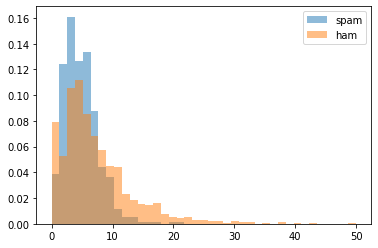

In [ ]:
# Change the upper bound to 50
bins = np.linspace(0, 50, 40)

plt.hist(data[data["label"] == "spam"]["punct%"], bins, alpha = 0.5, density= True, label = "spam")
plt.hist(data[data["label"] == "ham"]["punct%"], bins, alpha = 0.5, density = True, label = "ham")
plt.legend(loc = "upper right")
plt.show()

You can see there’s not nearly as much of a difference in punctuation use. You can also see that spam might be a little bit more concentrated here on the left, whereas ham tends to have more of a tail over to the right-hand side.

It’s pretty clear which one of these new features is likely to help out the model the most. So in terms of our original hypotheses, our hypothesis that spam messages tend to be longer than non-spam messages seems to be correct based on this evaluation, and this feature is likely to provide some value to the model. However, our hypothesis that ham messages contain less punctuation than spam doesn’t appear to be accurate, and it isn’t quite clear whether this feature will provide value to the model. Now, in cases like this where there is some separation between the distributions, typically we’ll err on the side of leaving this feature in the model just to see what kind of value the model itself may be able to extract out of it. qSo this is an example of how you might evaluate whether some newly created features will be useful to the model.

**Identifying Features for Transformation**

In order to determine whether transformation might be helpful, we can look at the distribution of our data using a histogram. Now, on the previous session, we looked at the normalized overlayed histograms, but we didn’t look at the full histogram so we’re still not exactly sure what the full distribution looks like for these new features. We only know when it’s split by label. The first thing we’ll do is look at those full distributions and then we can determine which one might be a fit for transformation. Now, what we’re looking for here is a dramatic skew with a really long tail or maybe a few outliers. These are scenarios that would make a feature a prime candidate for transformation.

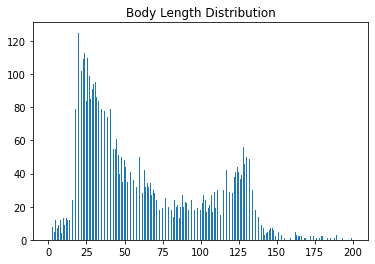

In [ ]:
#Plot the two new features
bins=np.linspace(0,200,400)

plt.hist(data['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

We saw that spam were mostly long so those are the ones concentrated down here. And real text are mostly short so those are the ones kind of concentrated down here. So we see this bimodal distribution here with two different spikes. I seems that this isn’t really a great candidate for transformation because it’s not really heavily skewed and there’s not really any clear outliers.

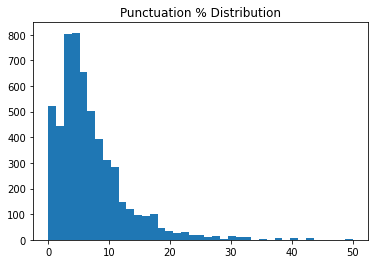

In [ ]:
bins = np.linspace(0,50,40)

plt.hist(data['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

This one could very well be a nice distribution for a transformation. It’s fairly skewed here where we see a lot close to zero and then we see the tail extending all the way up to 40 with some of these outliers. A model might dig too much into this skewed tail over here and generate a model maybe that’s a little bit biased. We’re going to focus on this feature for our transformations.

**Box-Cox Power Transformation**

A transformation is a process that alters each data point in a certain column in a systematic way that makes it cleaner for a model to use. For instance, that could mean squaring each value, or maybe taking the square root of each value in a given column. So let’s say a distribution for a certain feature has a long right tail like this one does in the following image. Then the transformation would aim to pull that tail in to make it a more compact distribution like we see in the example here using a log transformation. We do this so that the model doesn’t get distracted trying to chase down outliers in that tail.
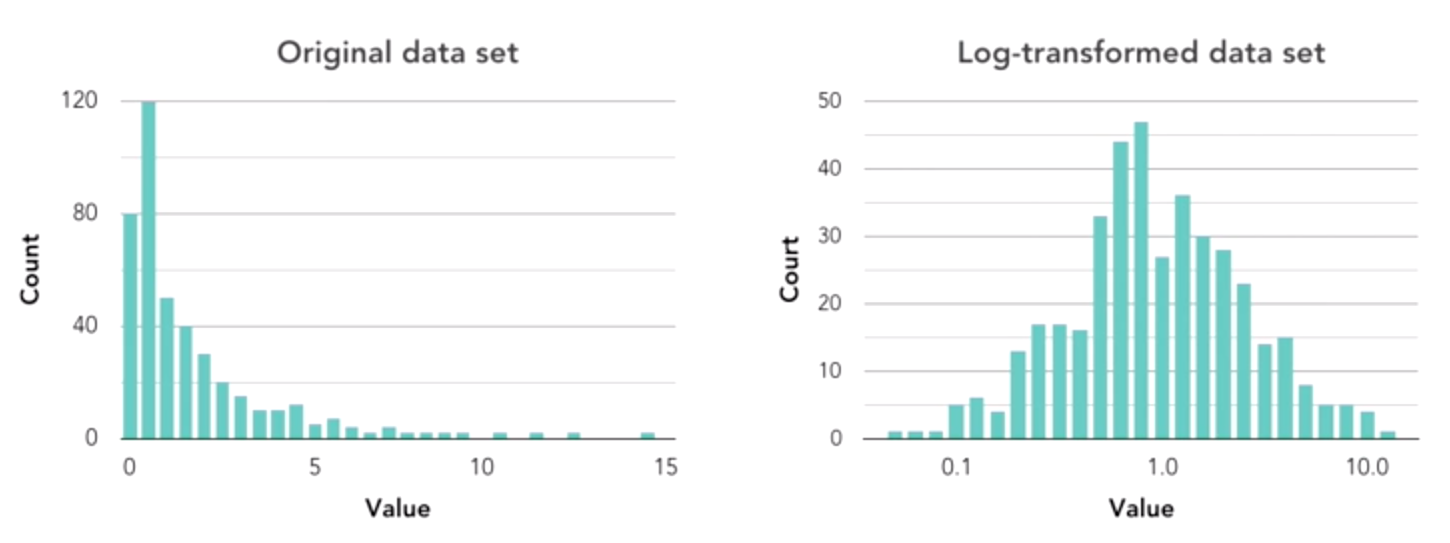

The series of transformation that we’ll be working with are call the Box-Cox Power Transformations. This is a very common type of transformation. The base form of this type of transformation is y to the x power, where y is the value in an individual cell, and the x is the exponent of the power transformation you’re applying. You’ll notice that the following table shows some common power transformations using exponents from negative two up to positive two. For the first line in the table with an exponent of negative two that translates to y to the negative two which is the same as one over y squared.

Base Form: $y^x$

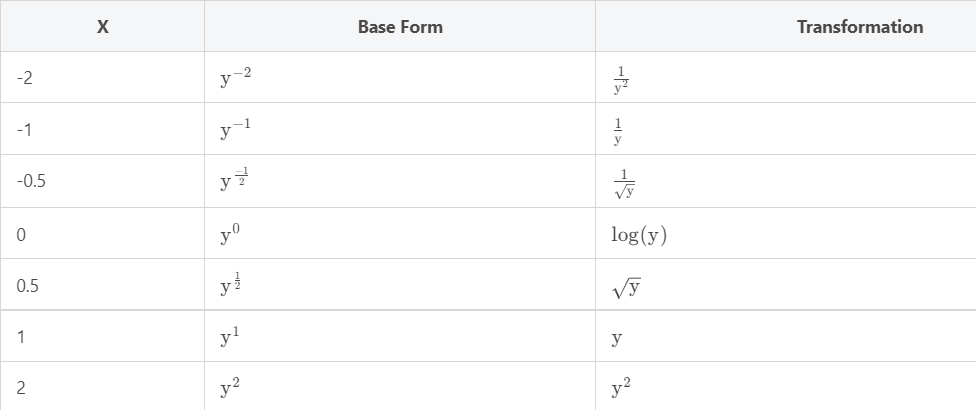


So let’s introduce an example which shows in the following table. Let’s say that 50% of the characters in a given text message are punctuation. So the value in that cell will be 50. So let’s go through these different transformations and see how that would impact the transformed value. Starting with the first line, one over y squared. So in this example that would be one over 50 squared, or one over 2,500, and that’ll give you 0.0004. Then the next transformation is just one over 50 and then it’s one over square root of 50 and so on. So this kind of gives you an idea of how different power transformations alter the original values.

So this kind of gives you an idea of how different power transformations alter the original values. In practice, what this process looks likes would be as following Process session. First you determine what range of exponents you want to test out. So in our example we had a range from negative two to positive two. And that’s a commonly used range. Then you’d apply these transformations to each value in the feature you’d like to transform. Then you’d use some criteria to determine which of the transformations yielded the best distribution. You can read about what different criteria you can use to determine the best distribution, but we, we’re just going to plot it in a histogram and pick the one that looks the most like a normal distribution because this means it’ll be a nice and compact distribution that’ll be easier for the model to use.

**Process**

1.  Determine what range of exponents to test.
2.  Apply each transformation to each value of your chosen feature.

1. Use some criteria to determine which of the transformations yield the best distribution.

So what we want to do is apply a bunch of different power transformations and pick the histogram that looks the most like a normal distribution.

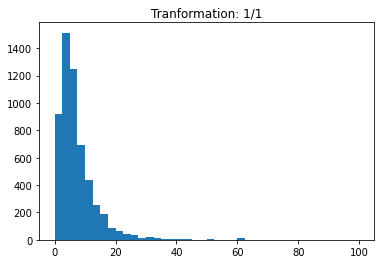

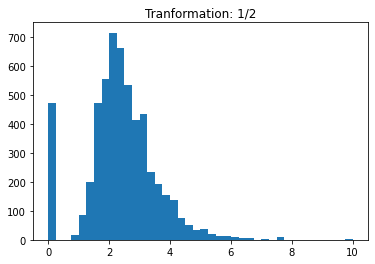

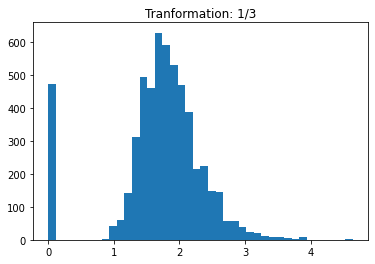

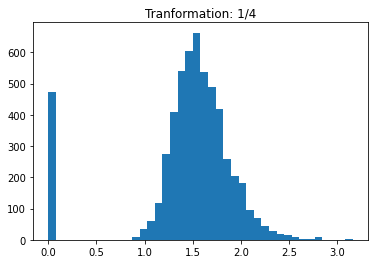

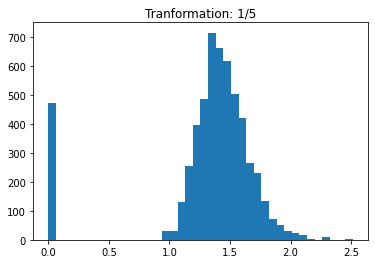

In [ ]:
for i in range(1,6):
  plt.hist((data['punct%'])**(1/i),bins=40)
  plt.title("Tranformation: 1/{}".format(str(i)))
  plt.show()

For the first loop through you’ll see that this is the exact distribution that we saw before.

As we move to the next one, the square root transformation, or exponent of one half, you can see it’s kind of starting to pull this tail in. You can see how much the scale has changed and you see it looks a little bit nicer, a little bit more compact, a little bit more like a normal distribution.

Then you go to one third, it’s even more so. More compact, more like a normal distribution.

One fourth is a little bit better and then one fifth is even better. Again you’ll notice that the outliers continue to get pulled in closer and closer to the center of the distribution. So given this view either one fourth or one fifth would be chosen as a transformation. Both of those look pretty good.

Before we move on, to be noted that you do have this stack to the left and all these are just zeros, so this means that there’s no punctuation. So any power transformation of zero is just going to keep it at zero so we’ll maintain that stack on the left. What we’re mostly concerned about is the rest of the distribution seeing how the transformation effects that. So these power transformations are a commonly used method to transformation skewed data or data that isn’t behaving particularly well. It helps your model key in on the data and leverage it to make predictions in a cleaner way.

# **Building Machine Learning Classifiers**

**Cross-validation and Evaluation Metrics**

There are a lot of different methods and metrics that you can use. The first thing that we need to define is a holdout test set. This is a sample of data that is set aside and not used in any of the fitting of the model for the purpose of evaluating the model’s ability to generalize to unseen data. So this is meant to simulate how the model will perform in real world scenarios. So this is the entire point of building these models, to generalize and say something about the world. Now given that concept of a holdout test set. Hold that in the back of your mind for just a minute. We’ll be primarily be using K-Fold Cross Validation to evaluate our models. In this process the full data set is k-subsets and the holdout method is repeated k times. That is, in each iteration one of the k-subsets is treated as the holdout test set and the other k-1 subsets are put together to train the model. The purpose is that this gives you a little bit more robust read on the performance of the model rather than just having one single hold out test set for the model to be evaluated on. Now you have K test sets and k evaluation metrics to understand the potential performance outcomes.

So let’s talk about actual evaluation metrics now. So for a classification problem like this spam ham data set that we’re working with, we’ll generally use three main performance metrics.
$$
Accuracy = \frac{\text{\# predicted correctly}}{\text{total \# of observations}}
$$
The first is accuracy shown above, so that’s just the number that you’ve predicted correctly over the total number of observations.  So if you have 10,000 observations and you’ve got 800 of them labeled correctly then your accuracy is 80%.
$$
Precision = \frac{\text{\# predicted as spam that are actually spam}}{\text{total \# predicted as spam}}
$$
The second metric is precision as shown above.  Within the context of the problem that we’re working with, that would be represented by the number that the model predicted as spam that are actually spam divided by the total number that the model predicted as spam.
$$
Recall = \frac{\text{\# predicted as spam that are actually spam}}{\text{total \# that are actually spam}}
$$
The last evaluation metric is called recall presented above, so that would be the number predicted by the model to be spam that are actually spam, so again that’s the same numerator as precision but now it’s just divided by the total number that are actually spam instead of the total number that are predicted as spam.  So that’s accuracy, precision and recall.

**Building a Random Forest Model**

In [ ]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
# Setting n_jobs to negative one allows this to run faster by building the individual decision trees in parallel.
rf=RandomForestClassifier(n_jobs= -1)
# Assigns each observation in our original data set to a certain subset, so there will be five subsets, and it will assign each observation to one of the five.
k_fold = KFold(n_splits=5)
# Put all of our components together and actually facilitate the cross-validation and return a score.
cross_val_score(rf,X_features,data['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.97576302, 0.98025135, 0.97484277, 0.96675651, 0.96945193])

**Random Forest with Holdout Test Set**

Reading in data, creating new features, cleaning that data, and then vectorizing it:

In [ ]:
data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1) #from sparse matrix to a dataframa
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8064,8065,8066,8067,8068,8069,8070,8071,8072,8073,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Getting the feature importances:

In [ ]:
# zip is going to wrapping two arrays together
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.045597878059104625, 7350),
 (0.04116290058741531, 1803),
 (0.040836299514032566, 'body_len'),
 (0.03544892912804678, 5724),
 (0.024134639799736055, 4796),
 (0.021332945935927453, 6746),
 (0.02092534543006513, 6285),
 (0.019983386856973612, 7027),
 (0.017670522636749664, 397),
 (0.017465461736850874, 2031)]

Now you’ll see all these numbers here, as we saw in our full data frame, when you vectorize, the actual words don’t become the column names, they’re just assigned a number. So that’s what these represent. But the main is that body length is pretty clearly the most important feature, which is not surprising, based on the feature evaluation that we did.

Making predictions to see the score:

In [ ]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label = "spam", average = "binary")
print("Precision:",precision)
print("Recall:",recall)
print("fscore:",fscore)

Precision: 1.0
Recall: 0.5900621118012422
fscore: 0.7421875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


So just as a reminder of what that actually means in the context of a spam filter, 100% precision, what that actually means is that when the model identified something as spam, it actually was spam 100% of the time. So that’s great. The 53.4% recall means that of all the spam that has come into your email, 53.4% of that spam was properly placed in the spam folder, which means that the other 46.6% went into your inbox, so that’s not great.

**Random Forest Model with Grid Search**

In the last session, we fit just a single model with a single set of hyperparameter settings, and then we generated a single set of evaluation metrics. But aren’t you a little curious to see if we can maybe make our model better, simply by changing the hyperparameter settings, like the number of estimators, or the max depth? We mentioned the last model wasn’t quite aggressive enough. Could we capture more spam by altering the hyperparameter settings? That’s where grid-search comes in. Grid-search basically means defining a grid of hyperparameter settings, and then exploring a model fit with each combination of those hyperparameter settings. So in our case, that means setting a range of number of estimators, and a range of max depth, that you’d like to explore. And then grid-search will test every combination of those, and fit a model and evaluate it, to see which hyperparameter combination generates the best model.

In [ ]:
def train_RF(n_est,depth):
  rf=RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
  rf_model=rf.fit(X_train,y_train)
  y_pred=rf_model.predict(X_test)
  precision,recall,fscore,support=score(y_test,y_pred,pos_label='spam',average='binary')
  print("Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(n_est,
                                                                                        depth,
                                                                                        round(precision, 3),
                                                                                        round(recall, 3),
                                                                                        round((y_pred == y_test).sum() / len(y_pred), 3)))

So now we have the function above that accepts number of estimators, and depth, constructs a random forest classifier object, using those number of estimators and depth, fits that model, predicts, and then generates some results metrics, and prints out those results at the very end.

The following nested for loop will iterate through each combination of these parameter settings, and train a model, evaluate that model on a test set, and then print out the results. That’s essentially what grid-search is. So the first time through, we’ll grab number of estimators equal to 10, and depth equal to 10, it’ll pass it into our function above, it’ll fit a model with those parameter settings and print out the results, and then it’ll iterate through each combination.

In [ ]:
for n_est in [10,50,100]:
  for depth in [10,20,30,None]:
    train_RF(n_est,depth)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.205 / Accuracy: 0.885


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.528 / Accuracy: 0.932


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: 30 ---- Precision: 0.992 / Recall: 0.727 / Accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 10 / Depth: None ---- Precision: 0.985 / Recall: 0.795 / Accuracy: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.267 / Accuracy: 0.894


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.59 / Accuracy: 0.941


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.764 / Accuracy: 0.966


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: None ---- Precision: 0.993 / Recall: 0.876 / Accuracy: 0.981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.205 / Accuracy: 0.885


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.571 / Accuracy: 0.938


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.752 / Accuracy: 0.964
Est: 100 / Depth: None ---- Precision: 0.993 / Recall: 0.87 / Accuracy: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


So in this example, as the depth increases from 10, to 20, to 30, and eventually to none, the recall increases quite drastically, while you see the precision doesn’t really drop. So the model is getting much better and more aggressive as the depth increases. On the other side, you’ll notice that adding estimators might be helping a little bit, but the improvement isn’t as drastic as adding depth to the individual trees. So by looking at these results, we can immediately eliminate any model that has a limited max depth. 10 is clearly pretty bad, no matter how many estimators you have. 20 isn’t really great either. Once you get towards 30, it starts to level out. So we know that the best random forest model is one with very high max depth, probably no limit. And number of estimators plays a little bit of a role, but not nearly as much as max depth. So this is a very broad view into how we would typically approach model fitting and evaluation. In general, we would explore a much wider range for each parameter setting, and we would probably explore more parameters also.

**Evaluate Random Forest Model Performance**

We’re going to combine grid search and cross-validation to create a very powerful model tuning and evaluation tool that is often the default tool for tuning and evaluating machine learning models. To recap very quickly, grid search is setting up different parameter settings that you want to test and then exhaustively searching that entire grid to determine the best model. And then cross-validation takes your data set, divides it into k subsets, then you repeat the holdout method where you train on some data set and evaluate it on a separate data set k times. So, in each iteration, you’re using a different subset of data as the test set and all the rest of the data as training set. So, combining these ideas into GridSearchCV, what this method will allow you to do is define a grid of parameters that you want to explore and then within each setting, it will run cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

In [ ]:
rf=RandomForestClassifier()
#Parameter grid
param= {'n_estimators':[10,150,300],
        'max_depth': [30,60,90,None]}
#Construct GridSearch object
gs = GridSearchCV(rf,param,cv=5,n_jobs=-1)
#Fit the model
gs_fit=gs.fit(X_features, data['label'])
# Print out the result using attribute called cv_results_
tfidf_result = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
count_result = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
tfidf_result[["mean_fit_time", "mean_score_time", "mean_test_score", "param_max_depth", "param_n_estimators"]]

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators
8,29.797047,0.370927,0.974311,90,300
7,15.068009,0.247318,0.973953,90,150
10,16.657321,0.261772,0.973952,None,150
11,30.945638,0.513161,0.973054,None,300
4,12.086629,0.230005,0.972516,60,150


There are 12 parameter combinations, so there’s 12 lines in this data set, but we’re only looking at the top five. mean_fit_time is the average time it takes each model to fit, mean_score_time is the average amount of time it takes each model to make a prediction on the test set, mean_test_score is the average accuracy on the test set, and then mean_train_score is the average accuracy on the training set. So in terms of parameter combinations, you’ll notice that the best performing models are the ones with the deepest individual decision trees. And you’ll see with the number of estimators doesn’t seem to matter quite as much as the top model. If you look at the mean_fit_time, you’ll see that it’s much, much faster for 10 estimators than it is for 150 or 300.

In [ ]:
count_result[["mean_fit_time", "mean_score_time", "mean_test_score", "param_max_depth", "param_n_estimators"]]

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators
8,30.615073,0.413528,0.973054,90,300
11,31.638457,0.402366,0.972515,None,300
7,15.611477,0.265106,0.972335,90,150
10,17.174072,0.288147,0.971797,None,150
4,12.476020,0.238061,0.971258,60,150


So now let’s take a look at how the mean_test_score on this tf-idf data set compares to the count vectorizer data set. Let’s scroll down here and this is exactly the same setup as the prior section, just with the CountVectorizer instead of TfidfVectorizer. So, this call out that the mean_test_score at 97.3% is just a tad below the 97.4% for the tf-idf, so tf-idf is doing slightly better.

In practice, we would usually explore a lot more settings than we’re exploring here. We would also test N-grams, whether we should include stopwords, whether removing punctuation is helpful, and we test different parameters within the vectorizer and four, five other hyperparameter settings within Random Forest. As you can imagine, exploring all these different combinations can quickly generate an enormous base of candidate models. It’s not uncommon to test over a hundred or even a thousand in some cases. So, that’s a quick introduction into Random Forest and learning how to tune and evaluate the model using two different vectorizing frameworks.

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#The following code is the function to perform gradient boosting:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators = est, max_depth = max_depth, learning_rate = lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = "spam", average = "binary")
    print("Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(est,
                                                                                              max_depth,
                                                                                              lr,
                                                                                              round(precision, 3),
                                                                                              round(recall, 3),
                                                                                              round((y_pred == y_test).sum() / len(y_pred), 3)))


In [ ]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.957 / Recall: 0.683 / Accuracy: 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.903 / Recall: 0.752 / Accuracy: 0.952


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.934 / Recall: 0.795 / Accuracy: 0.962


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.87 / Recall: 0.789 / Accuracy: 0.952


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.938 / Recall: 0.839 / Accuracy: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.894 / Recall: 0.839 / Accuracy: 0.962


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.921 / Recall: 0.863 / Accuracy: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.905 / Recall: 0.832 / Accuracy: 0.963


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.964 / Recall: 0.503 / Accuracy: 0.925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.955 / Recall: 0.783 / Accuracy: 0.963


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 3 / LR: 1 ---- Precision: 0.927 / Recall: 0.789 / Accuracy: 0.961


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 7 / LR: 0.01 ---- Precision: 0.938 / Recall: 0.658 / Accuracy: 0.944


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 7 / LR: 0.1 ---- Precision: 0.944 / Recall: 0.839 / Accuracy: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 7 / LR: 1 ---- Precision: 0.858 / Recall: 0.789 / Accuracy: 0.951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 11 / LR: 0.01 ---- Precision: 0.929 / Recall: 0.727 / Accuracy: 0.952


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 11 / LR: 0.1 ---- Precision: 0.938 / Recall: 0.851 / Accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 11 / LR: 1 ---- Precision: 0.912 / Recall: 0.839 / Accuracy: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 15 / LR: 0.01 ---- Precision: 0.933 / Recall: 0.776 / Accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 15 / LR: 0.1 ---- Precision: 0.932 / Recall: 0.857 / Accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 100 / Depth: 15 / LR: 1 ---- Precision: 0.943 / Recall: 0.82 / Accuracy: 0.967


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 3 / LR: 0.01 ---- Precision: 0.957 / Recall: 0.553 / Accuracy: 0.932


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 3 / LR: 0.1 ---- Precision: 0.949 / Recall: 0.801 / Accuracy: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 3 / LR: 1 ---- Precision: 0.901 / Recall: 0.789 / Accuracy: 0.957


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 7 / LR: 0.01 ---- Precision: 0.925 / Recall: 0.689 / Accuracy: 0.947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 7 / LR: 0.1 ---- Precision: 0.932 / Recall: 0.857 / Accuracy: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 7 / LR: 1 ---- Precision: 0.883 / Recall: 0.795 / Accuracy: 0.955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 11 / LR: 0.01 ---- Precision: 0.933 / Recall: 0.776 / Accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 11 / LR: 0.1 ---- Precision: 0.945 / Recall: 0.851 / Accuracy: 0.971


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 11 / LR: 1 ---- Precision: 0.932 / Recall: 0.845 / Accuracy: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 15 / LR: 0.01 ---- Precision: 0.928 / Recall: 0.801 / Accuracy: 0.962


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Est: 150 / Depth: 15 / LR: 0.1 ---- Precision: 0.933 / Recall: 0.87 / Accuracy: 0.972
Est: 150 / Depth: 15 / LR: 1 ---- Precision: 0.93 / Recall: 0.82 / Accuracy: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


For the worst models on this list, you could see that the learning rate of 0.01 is a very common theme, and in general, the worst models also had a low number of estimators. Let’s take a look at some of the best models. Based on the results here, all of the best models had a learning rate of 0.1. Now we can draw that distinction, that that instruction to the model, of whether the learning rate is 0.01, or it’s 0.1, is making a big difference in terms of the results of the model. For this problem, it appears that this learning rate of 0.1 is ideal. You’ll also note that the estimators and the max depth are on the high end of the ranges that we tested out.

**Evaluate Gradient-boosting Model Performance**

If you remember back to when we did GridSearchCV with random forest, we leave that classifier empty, and then we define our parameters using this parameter grid. What the parameter grid will be, is it’ll be a dictionary, where the keys are the hyper-parameter values, and the parameter grid will be a dictionary where the keys of the dictionary will be your hyper-parameters, and then the values will be a list of settings that you want to try out.

The following code presents this concept in TF-IDF:

In [ ]:
gb = GradientBoostingClassifier()

param = {
    "n_estimators": [100, 150],
    "max_depth": [7, 11, 15],
    "learning_rate": [0.1]
}
gs = GridSearchCV(gb, param, cv = 5, n_jobs = -1)
cv_fit = gs.fit(X_tfidf_feat, data["label"])
tfidf_df = pd.DataFrame(cv_fit.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]
tfidf_df

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,180.689653,2.151761,0.219943,0.010338,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.963196,0.979354,0.971249,0.965858,0.969452,0.969822,0.005525,1
2,174.426561,1.647899,0.282637,0.127803,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.965889,0.980251,0.968553,0.967655,0.966757,0.969821,0.005290,2
3,272.258446,3.362959,0.295804,0.098712,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.965889,0.979354,0.967655,0.968553,0.964960,0.969282,0.005193,3
5,331.038360,46.007164,0.280036,0.137997,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.964093,0.975763,0.968553,0.968553,0.967655,0.968924,0.003795,4
4,226.797657,3.693982,0.282710,0.132098,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.964991,0.974865,0.967655,0.964960,0.969452,0.968385,0.003658,5


The n_jobs=-1 means that we’ll train models on different subsets and parameter settings in parallel. It does not mean that each of the models themselves will be trained in parallel. Again, that’s because gradient boosting cannot be trained in parallel, because each iteration depends on the prior iteration.

In [ ]:
gb = GradientBoostingClassifier()

param = {
    "n_estimators": [100, 150],
    "max_depth": [7, 11, 15],
    "learning_rate": [0.1]
}
gs = GridSearchCV(gb, param, cv = 5, n_jobs = -1)
cv_fit = gs.fit(X_count_feat, data["label"])
count_df = pd.DataFrame(cv_fit.cv_results_).sort_values("mean_test_score", ascending = False)[0:5]
count_df

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,333.942812,41.047325,0.224112,0.056343,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.963196,0.978456,0.969452,0.968553,0.972147,0.970361,0.004983,1
3,275.804967,13.600467,0.217727,0.020682,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.965889,0.978456,0.968553,0.966757,0.972147,0.970360,0.004582,2
1,176.456367,1.357803,0.203475,0.009270,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.962298,0.979354,0.968553,0.965858,0.967655,0.968744,0.005721,3
0,115.648586,0.248664,0.205583,0.010084,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.963196,0.979354,0.969452,0.963163,0.966757,0.968384,0.005972,4
2,175.232458,9.861905,0.199012,0.008406,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.964093,0.976661,0.967655,0.960467,0.970350,0.967845,0.005523,5


the mean_test_scores are all just around 96 - 97 percent, or just below. And you can see that the best models are the ones with 150 estimators, and around 11 max_depth. So the very best model has 150 estimators, and a max_depth of 7. So let’s look at the results for the count vectorizing really quick. So you can see that the time it takes to fit the the mean_test_score, is pretty much right in line with tfidf. So it doesn’t look like there’s too much of a difference, all the test score results are just around 96 to 97 percent. So it’s the one with 150 estimators, and a max_depth of 11. Okay, so now we’ve tested two different algorithms, random forest, and gradient boosting, on two different vectorization methods, tfidf, and count vectorization, across a variety of hyper-parameter settings. So now we have a pretty good idea of what the models look like, and how they’re performing.